In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

Frequency:  [25.  35.  41.7 55.  61.  75. ]  MHz
A12 confusion noise:  [2.90746601 1.7317192  1.32230834 0.86334369 0.73609576 0.53548575]  Jy/beam


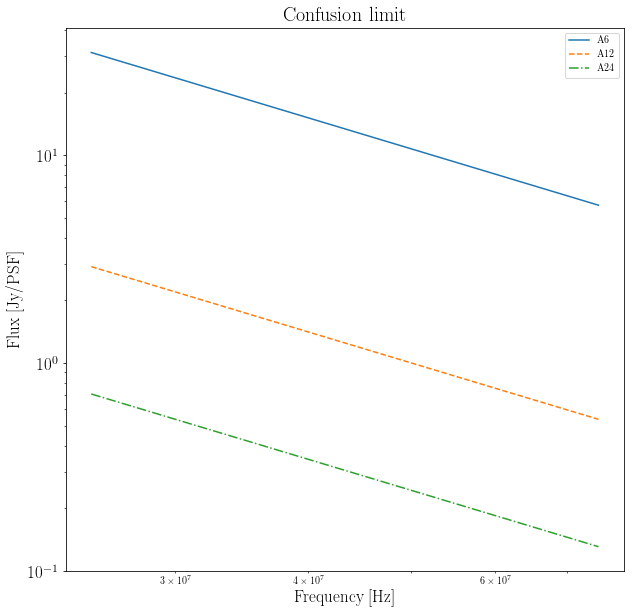

In [7]:
# From LWA paper:
# Source confusion noise

frequency = np.array([25., 35., 41.7, 55., 61., 75.]) * 1.e6 # Hz
#frequency = np.array(np.log10(np.logspace(15,80,num=1000)))*1.e6
longest_baseline_A6 = 300. # A6, meters
longest_baseline_A12 = 1.4e3 # A12, meters
longest_baseline_A24 = 3.5e3 # A24 (core), meters

wav = 3.e8 / frequency

psf_A6 = (wav/longest_baseline_A6) *(180./np.pi) * 3600. # in "
psf_A12 = (wav/longest_baseline_A12) *(180./np.pi) * 3600. # in "
psf_A24 = (wav/longest_baseline_A24) *(180./np.pi) * 3600. # in "

sigma_c_A6 = np.power(psf_A6, 1.54) * 29.0e-6
sigma_c_A12 = np.power(psf_A12, 1.54) * 29.0e-6
sigma_c_A24 = np.power(psf_A24, 1.54) * 29.0e-6

print 'Frequency: ', frequency/1.e6 , ' MHz'
print 'A12 confusion noise: ', sigma_c_A12 , ' Jy/beam'

#plt.ylim(-20,20)

fig = plt.figure(figsize=(10, 10))
axis = fig.add_subplot(111)
#axis.grid()
#axis.set_aspect('equal')
axis.tick_params(axis='y', labelsize=17)

axis.loglog(frequency, sigma_c_A6, '-', frequency, sigma_c_A12, '--', frequency, sigma_c_A24, '-.')
plt.title('Confusion limit', fontsize=20)
plt.xlabel('Frequency [Hz]', fontsize=17)
plt.ylabel('Flux [Jy/PSF]', fontsize=17)
axis.legend(['A6','A12','A24'])
plt.show()

In the analysis to follow we will calculate characteristic quantities for bandwidths of: 1, 2 and 6 MHz centered on: 25, 35, 45, 55, 65, 75 MHz in LBA: 

Confusion noise for AARTFAAC 12 (equation 4 in Cohen at al. 2004):

1.67867116 0.99983527 0.67896279 0.49846504 0.38539553 0.3091711

Confusion noise for AARTFAAC 24 (longest baseline 3.5 km)

[0.70906661 0.42232798 0.28679223 0.21055042 0.16279013 0.13059312]  Jy/beam

In [4]:
# From LWA paper:
# Classical image noise

#T_sys = 2000. # K (74 MHz)

T_sky = 60. * np.power(wav, 2.55)
#T_sys = T_sky + T_inst
T_sys = T_sky # around 58 MHz, worse on either side
A_eff = 1. * np.divide(np.power(wav, 2.), 4.) # (m^2), one dipole
N6 = 288 # number of dipoles, A6
N12 = 576 # number of dipoles, A12
N24 = 1152 # number of dipoles, A24
N24f = 2304 # A24, 96 RCUs
dT = 1. # observing time, seconds
dF1sb = 0.192 # MHz (bandwidth, 1 SB)
dF1m = 1. # MHz (bandwidth, 1 MHz)
dF2m = 2. # MHz (bandwidth, 2 MHz)
dF6m = 6. # MHz (bandwidth, 6 MHz)
dF12m = 12. # MHz (bandwidth, 12 MHz)
N_if = 4. # polarizations

1.0 3.0 12.0 1.0


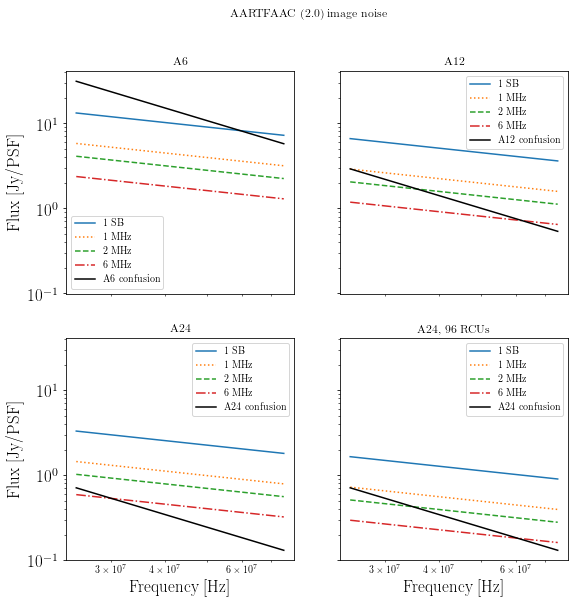

In [5]:
sigma_rms_image6_1sb = np.divide(T_sys, (A_eff * np.sqrt(N6 * (N6 - 1) * N_if * np.divide(dT, 3600.) * dF1sb))) * 58.9e-3 # Jy/beam
sigma_rms_image6_1m = np.divide(T_sys, (A_eff * np.sqrt(N6 * (N6 - 1) * N_if * np.divide(dT, 3600.) * dF1m))) * 58.9e-3 # Jy/beam
sigma_rms_image6_2m = np.divide(T_sys, (A_eff * np.sqrt(N6 * (N6 - 1) * N_if * np.divide(dT, 3600.) * dF2m))) * 58.9e-3 # Jy/beam
sigma_rms_image6_6m = np.divide(T_sys, (A_eff * np.sqrt(N6 * (N6 - 1) * N_if * np.divide(dT, 3600.) * dF6m))) * 58.9e-3 # Jy/beam

sigma_rms_image12_1sb = np.divide(T_sys, (A_eff * np.sqrt(N12 * (N12 - 1) * N_if * np.divide(dT, 3600.) * dF1sb))) * 58.9e-3 # Jy/beam
sigma_rms_image12_1m = np.divide(T_sys, (A_eff * np.sqrt(N12 * (N12 - 1) * N_if * np.divide(dT, 3600.) * dF1m))) * 58.9e-3 # Jy/beam
sigma_rms_image12_2m = np.divide(T_sys, (A_eff * np.sqrt(N12 * (N12 - 1) * N_if * np.divide(dT, 3600.) * (dF2m)))) * 58.9e-3 # Jy/beam
sigma_rms_image12_6m = np.divide(T_sys, (A_eff * np.sqrt(N12 * (N12 - 1) * N_if * np.divide(dT, 3600.) * dF6m))) * 58.9e-3 # Jy/beam

sigma_rms_image24_1sb = np.divide(T_sys, (A_eff * np.sqrt(N24 * (N24 - 1) * N_if * np.divide(dT, 3600.) * dF1sb))) * 58.9e-3 # Jy/beam
sigma_rms_image24_1m = np.divide(T_sys, (A_eff * np.sqrt(N24 * (N24 - 1) * N_if * np.divide(dT, 3600.) * dF1m))) * 58.9e-3 # Jy/beam
sigma_rms_image24_2m = np.divide(T_sys, (A_eff * np.sqrt(N24 * (N24 - 1) * N_if * np.divide(dT, 3600.) * dF2m))) * 58.9e-3 # Jy/beam
sigma_rms_image24_6m = np.divide(T_sys, (A_eff * np.sqrt(N24 * (N24 - 1) * N_if * np.divide(dT, 3600.) * dF6m))) * 58.9e-3 # Jy/beam

sigma_rms_image24f_1sb = np.divide(T_sys, (A_eff * np.sqrt(N24f * (N24f - 1) * N_if * np.divide(dT, 3600.) * dF1sb))) * 58.9e-3 # Jy/beam
sigma_rms_image24f_1m = np.divide(T_sys, (A_eff * np.sqrt(N24f * (N24f - 1) * N_if * np.divide(dT, 3600.) * dF1m))) * 58.9e-3 # Jy/beam
sigma_rms_image24f_2m = np.divide(T_sys, (A_eff * np.sqrt(N24f * (N24f - 1) * N_if * np.divide(dT, 3600.) * dF2m))) * 58.9e-3 # Jy/beam
sigma_rms_image24f_6m = np.divide(T_sys, (A_eff * np.sqrt(N24f * (N24f - 1) * N_if * np.divide(dT, 3600.) * dF6m))) * 58.9e-3 # Jy/beam

#print 'A12 image RMS noise: ', sigma_rms_image , ' Jy/beam'
print dF1m, dF2m+1., dF12m, dT
f, ((axis1, axis2),(axis3, axis4)) = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(9, 9))
#f.subplots_adjust(hspace=0, wspace=0)
f.suptitle('AARTFAAC (2.0) image noise')
#f.tight_layout()
#axis1.set_aspect('equal')
axis1.tick_params(axis='y', labelsize=17)

axis1.loglog(frequency, sigma_rms_image6_1sb, '-', frequency, sigma_rms_image6_1m, ':', 
             frequency, sigma_rms_image6_2m, '--', frequency, sigma_rms_image6_6m, '-.', frequency, sigma_c_A6, '-k')
axis1.set_title('A6')
#axis1.grid()
axis1.legend(['1 SB','1 MHz','2 MHz', '6 MHz', 'A6 confusion'])
#axis1.ticklabel_format(axis='both', style='sci', scilimits=None, useOffset=None, useLocale=None, useMathText=None)
#axis1.set_xlabel('Frequency [Hz]')
axis1.set_ylabel('Flux [Jy/PSF]', fontsize=17)

axis2.loglog(frequency, sigma_rms_image12_1sb, '-', frequency, sigma_rms_image12_1m, ':', 
             frequency, sigma_rms_image12_2m, '--', frequency, sigma_rms_image12_6m, '-.', frequency, sigma_c_A12, '-k')
axis2.legend(['1 SB','1 MHz','2 MHz', '6 MHz', 'A12 confusion'])
axis2.set_title('A12')

axis3.loglog(frequency, sigma_rms_image24_1sb, '-', frequency, sigma_rms_image24_1m, ':', 
             frequency, sigma_rms_image24_2m, '--', frequency, sigma_rms_image24_6m, '-.', frequency, sigma_c_A24, '-k')
axis3.legend(['1 SB','1 MHz','2 MHz', '6 MHz','A24 confusion'])
axis3.set_title('A24')
#axis3.tick_params(axis='x', fontdict=font)
axis3.tick_params(axis='y', labelsize=17)
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
axis3.set_xlabel('Frequency [Hz]', fontsize=17)
axis3.set_ylabel('Flux [Jy/PSF]', fontsize=17)

axis4.loglog(frequency, sigma_rms_image24f_1sb, '-', frequency, sigma_rms_image24f_1m, ':', 
             frequency, sigma_rms_image24f_2m, '--', frequency, sigma_rms_image24f_6m, '-.', frequency, sigma_c_A24, '-k')
axis4.legend(['1 SB','1 MHz','2 MHz', '6 MHz','A24 confusion'])
axis4.set_title('A24, 96 RCUs')
axis4.set_xlabel('Frequency [Hz]', fontsize=17)

plt.show()

Theoretical image r.m.s. noise (assuming that T_sys = T_sky which is approximately true only around 58 MHz, in other areas of the band the noise is larger). Numbers given are for 2 polarizations, observing time of 10  minutes.

A12 for 1 SB bandwidth (192 kHz):

[0.3808387  0.31649777 0.27563933 0.24683605 0.22516751 0.20812506]  Jy/beam

1 MHz bandwidth:

A12 image RMS noise:  [0.16687516 0.13868237 0.12077911 0.10815814 0.09866346 0.09119583]  Jy/beam

2 MHz:

A12 image RMS noise:  [0.11799855 0.09806325 0.08540372 0.07647935 0.0697656  0.06448519]  Jy/beam

6 MHz:

[0.0681265  0.05661684 0.04930786 0.04415538 0.04027919 0.03723054]  Jy/beam

Core: 

A24, 1 SB bandwidth image RMS noise:  [0.19033661 0.15818012 0.13775978 0.1233644  0.11253484 0.10401732]  Jy/beam

A24, 1 MHz bandwidth image RMS noise:  [0.08340132 0.06931106 0.06036331 0.05405557 0.0493103  0.0455781 ]  Jy/beam

A24, 2 MHz image RMS noise:  [0.05897364 0.04901032 0.04268331 0.03822306 0.03486764 0.03222859]  Jy/beam

A24, 6 MHz image RMS noise:  [0.03404845 0.02829612 0.02464322 0.0220681  0.02013084 0.01860718]  Jy/beam


A12 image RMS noise (LOFAR calculation):  [0.0436972  0.03929431 0.04430162 0.02992441 0.02849005 0.02627783]  Jy/beam
900.0 1.0 3.0 6.0


Text(0.5,0,'Frequency [Hz]')

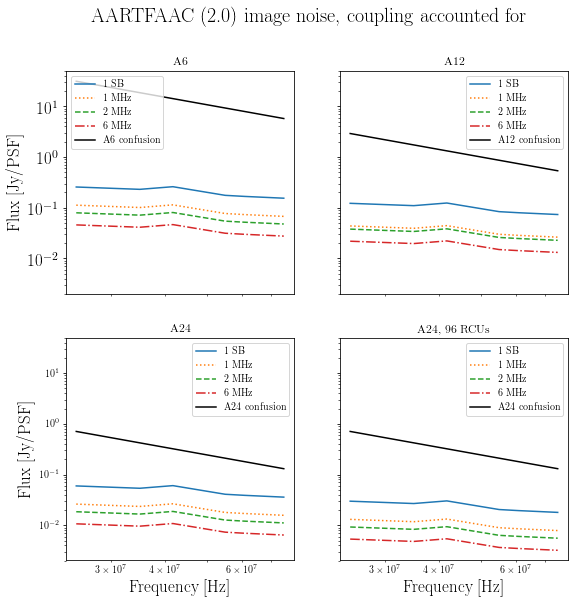

In [8]:
# From LOFAR sensitivity memo Nijboer():
# Classical image noise

eta = 1. # system efficiency factor
k = 1.38e-23 # Boltzmann constant,  m^2 kg s^-2 K^-1
# 1Jy = 10^-26 W m^-2 Hz^-1 = 10^-26 kg m^2 s^-3 m^-2 s = kg s^-2
#A_eff_outer = 256. # m^2, for 48 dipoles in LBA_OUTER

#A_eff_outer = np.interp(frequency, np.array([15., 30., 45., 60., 75.])*1.e6, 
                        #np.array([1973.4, 1343.5, 693.61, 398.18, 256.])) # 48 dipoles, LBA_OUTER, 
                                                                          # A_eff coupling dependent
                                                                          # interpolated from Nijboer et al. memo
        
A_eff_outer = np.interp(frequency, np.array([15., 30., 41.7, 61., 75.])*1.e6, 
                        np.array([4488., 1559., 708.3, 399.9, 256.])) # 48 dipoles, LBA_OUTER, 
                                                                          # A_eff coupling dependent
                                                                          # interpolated from LOFAR paper (van Haarlem)

N6 = 6. # A6
N12 = 12.
N24 = 24.
dT = 900. #s

SEFD = (2.* eta * k * T_sky) / (A_eff_outer * 1.e-26) # m^2 kg s^-2 K^-1 K m^-2 = kg s^-2, divide by 10^-26 to be in Jy

SEFD_96 = (2.* eta * k * T_sky) / (A_eff_outer * 2. * 1.e-26)

#print 'T_sky: ', T_sky
#print 'Frequencies: ', frequency
#print 'SEFD of a LOFAR station in LBA_OUTER mode: ', SEFD/1.e3, ' kJy'
#print 'First SEFD value: ', (2.* eta * k * T_sky[0]) / (A_eff_outer[0] * 1.e-26) / 1.e3

sigma_rms_image_lofar6_1sb = SEFD / np.sqrt(N6 * (N6 - 1) * N_if * dT * dF1sb * 1.e6) # have to convert to BW in Hz instead of MHz
sigma_rms_image_lofar6_1m = SEFD / np.sqrt(N6 * (N6 - 1) * N_if * dT * dF1m * 1.e6)
sigma_rms_image_lofar6_2m = SEFD / np.sqrt(N6 * (N6 - 1) * N_if * dT * dF2m * 1.e6)
sigma_rms_image_lofar6_6m = SEFD / np.sqrt(N6 * (N6 - 1) * N_if * dT * dF6m * 1.e6)

sigma_rms_image_lofar12_1sb = SEFD / np.sqrt(N12 * (N12 - 1) * N_if * dT * dF1sb * 1.e6)
sigma_rms_image_lofar12_1m = SEFD / np.sqrt(N12 * (N12 - 1) * N_if * dT * (dF1m+0.5) * 1.e6)
sigma_rms_image_lofar12_2m = SEFD / np.sqrt(N12 * (N12 - 1) * N_if * dT * dF2m * 1.e6)
sigma_rms_image_lofar12_6m = SEFD / np.sqrt(N12 * (N12 - 1) * N_if * dT * dF6m * 1.e6)

sigma_rms_image_lofar24_1sb = SEFD / np.sqrt(N24 * (N24 - 1) * N_if * dT * dF1sb * 1.e6)
sigma_rms_image_lofar24_1m = SEFD / np.sqrt(N24 * (N24 - 1) * N_if * dT * dF1m * 1.e6)
sigma_rms_image_lofar24_2m = SEFD / np.sqrt(N24 * (N24 - 1) * N_if * dT * dF2m * 1.e6)
sigma_rms_image_lofar24_6m = SEFD / np.sqrt(N24 * (N24 - 1) * N_if * dT * dF6m * 1.e6)

sigma_rms_image_lofar24_96_1sb = SEFD_96 / np.sqrt(N24 * (N24 - 1) * N_if * dT * dF1sb * 1.e6)
sigma_rms_image_lofar24_96_1m = SEFD_96 / np.sqrt(N24 * (N24 - 1) * N_if * dT * dF1m * 1.e6)
sigma_rms_image_lofar24_96_2m = SEFD_96 / np.sqrt(N24 * (N24 - 1) * N_if * dT * dF2m * 1.e6)
sigma_rms_image_lofar24_96_6m = SEFD_96 / np.sqrt(N24 * (N24 - 1) * N_if * dT * dF6m * 1.e6)

print 'A12 image RMS noise (LOFAR calculation): ', sigma_rms_image_lofar12_1m, ' Jy/beam'
print dT, dF1m, dF2m+1., dF6m

f, ((axis1, axis2), (axis3, axis4)) = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(9, 9))
#f.subplots_adjust(hspace=0, wspace=0)
f.suptitle('AARTFAAC (2.0) image noise, coupling accounted for', fontsize=20)
#f.tight_layout()
#axis1.set_aspect('equal')
axis1.tick_params(axis='y', labelsize=17)

axis1.set_title('A6')
axis1.loglog(frequency, sigma_rms_image_lofar6_1sb, '-', frequency, sigma_rms_image_lofar6_1m, ':', 
             frequency, sigma_rms_image_lofar6_2m, '--', frequency, sigma_rms_image_lofar6_6m, '-.',
             frequency, sigma_c_A6, '-k')
axis1.legend(['1 SB','1 MHz','2 MHz', '6 MHz','A6 confusion'])
axis1.set_ylabel('Flux [Jy/PSF]', fontsize=17)

axis2.set_title('A12')
axis2.loglog(frequency, sigma_rms_image_lofar12_1sb, '-', frequency, sigma_rms_image_lofar12_1m, ':', 
             frequency, sigma_rms_image_lofar12_2m, '--', frequency, sigma_rms_image_lofar12_6m, '-.',
             frequency, sigma_c_A12, '-k')
axis2.legend(['1 SB','1 MHz','2 MHz', '6 MHz','A12 confusion'])
#axis2.set_ylabel('Flux [Jy/PSF]', fontsize=17)

axis3.set_title('A24')
axis3.loglog(frequency, sigma_rms_image_lofar24_1sb, '-', frequency, sigma_rms_image_lofar24_1m, ':', 
             frequency, sigma_rms_image_lofar24_2m, '--', frequency, sigma_rms_image_lofar24_6m, '-.',
             frequency, sigma_c_A24, '-k')
axis3.legend(['1 SB','1 MHz','2 MHz', '6 MHz','A24 confusion'])

axis3.set_xlabel('Frequency [Hz]', fontsize=17)
axis3.set_ylabel('Flux [Jy/PSF]', fontsize=17)

axis4.set_title('A24,  96 RCUs')
axis4.loglog(frequency, sigma_rms_image_lofar24_96_1sb, '-', frequency, sigma_rms_image_lofar24_96_1m, ':', 
             frequency, sigma_rms_image_lofar24_96_2m, '--', frequency, sigma_rms_image_lofar24_96_6m, '-.',
             frequency, sigma_c_A24, '-k')
axis4.legend(['1 SB','1 MHz','2 MHz', '6 MHz','A24 confusion'])

axis4.set_xlabel('Frequency [Hz]', fontsize=17)
#axis4.set_ylabel('Flux [Jy/PSF]', fontsize=17)

Same as before, but based on A_eff numbers (LBA_OUTER mode) from Nijboer et al. :

A12 for 1 SB bandwidth: [0.3452569  0.20181061 0.17273648 0.14461395 0.13372703 0.127217  ]  Jy/beam

A12 for 1 MHz bandwidth: [0.15128399 0.08842898 0.07568933 0.06336666 0.05859625 0.0557437 ]  Jy/beam

A12 for 2 MHz bandwidth: [0.10697394 0.06252873 0.05352044 0.04480699 0.0414338  0.03941675]  Jy/beam

A12 for 6 MHz bandwidth: [0.06176143 0.03610098 0.03090004 0.02586933 0.02392182 0.02275727]  Jy/beam


A24 for 1 SB bandwidth: [0.16883396 0.09868734 0.08446981 0.07071762 0.06539381 0.06221034]  Jy/beam

A24 for 1 MHz bandwidth: [0.07397933 0.04324262 0.03701281 0.03098691 0.02865413 0.0272592 ] Jy/beam

A24 for 2 MHz bandwidth: [0.05231129 0.03057715 0.02617201 0.02191105 0.02026153 0.01927517]  Jy/beam

A24 for 6 MHz bandwidth: [0.03020194 0.01765373 0.01511042 0.01265035 0.011698   0.01112852]  Jy/beam

A12 image RMS noise (LOFAR calculation):  [0.31377662 0.26446694 0.25089587 0.21191853 0.20960692 0.1886933 ]  Jy/beam


Text(0.5,0,'Frequency [Hz]')

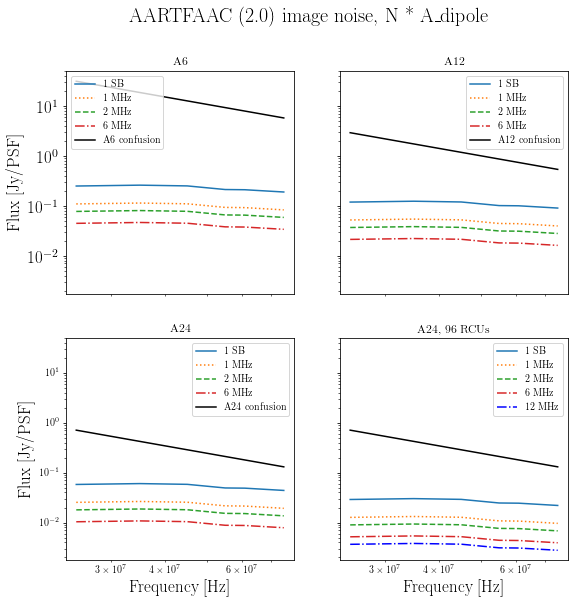

In [7]:
# From LOFAR sensitivity memo Nijboer():
# Classical image noise

eta = 1. # system efficiency factor
k = 1.38e-23 # Boltzmann constant,  m^2 kg s^-2 K^-1
# 1Jy = 10^-26 W m^-2 Hz^-1 = 10^-26 kg m^2 s^-3 m^-2 s = kg s^-2
#A_eff_outer = 256. # m^2, for 48 dipoles in LBA_OUTER

A_eff_outer_full = np.interp(frequency, np.array([15., 30., 45., 60., 75.])*1.e6, 
                        np.array([6400., 1600., 711.11, 400., 256.])) # 48 dipoles, LBA_OUTER, 
                                                                          # A_eff = 48 * A_dipole
                                                                          # interpolated from Nijboer et al. memo
A_eff_full_all = 2. * A_eff_outer_full


N6 = 6. # A6
N12 = 12.
N24 = 24.

SEFD_full = (2.* eta * k * T_sky) / (A_eff_outer_full * 1.e-26) # m^2 kg s^-2 K^-1 K m^-2 = kg s^-2, divide by 10^-26 to be in Jy
SEFD_full_all = (2.* eta * k * T_sky) / (A_eff_full_all * 1.e-26)
#print 'T_sky: ', T_sky
#print 'Frequencies: ', frequency
#print 'SEFD of a LOFAR station in LBA_OUTER mode: ', SEFD/1.e3, ' kJy'
#print 'First SEFD value: ', (2.* eta * k * T_sky[0]) / (A_eff_outer[0] * 1.e-26) / 1.e3

sigma_rms_image_lofar6_1sb_full = SEFD_full / np.sqrt(N6 * (N6 - 1) * N_if * dT * dF1sb * 1.e6) # have to convert to BW in Hz instead of MHz
sigma_rms_image_lofar6_1m_full = SEFD_full / np.sqrt(N6 * (N6 - 1) * N_if * dT * dF1m * 1.e6)
sigma_rms_image_lofar6_2m_full = SEFD_full / np.sqrt(N6 * (N6 - 1) * N_if * dT * dF2m * 1.e6)
sigma_rms_image_lofar6_6m_full = SEFD_full / np.sqrt(N6 * (N6 - 1) * N_if * dT * dF6m * 1.e6)

sigma_rms_image_lofar12_1sb_full = SEFD_full / np.sqrt(N12 * (N12 - 1) * N_if * dT * dF1sb * 1.e6)
sigma_rms_image_lofar12_1m_full = SEFD_full / np.sqrt(N12 * (N12 - 1) * N_if * dT * dF1m * 1.e6)
sigma_rms_image_lofar12_2m_full = SEFD_full / np.sqrt(N12 * (N12 - 1) * N_if * dT * dF2m * 1.e6)
sigma_rms_image_lofar12_6m_full = SEFD_full / np.sqrt(N12 * (N12 - 1) * N_if * dT * dF6m * 1.e6)

sigma_rms_image_lofar24_1sb_full = SEFD_full / np.sqrt(N24 * (N24 - 1) * N_if * dT * dF1sb * 1.e6)
sigma_rms_image_lofar24_1m_full = SEFD_full / np.sqrt(N24 * (N24 - 1) * N_if * dT * dF1m * 1.e6)
sigma_rms_image_lofar24_2m_full = SEFD_full / np.sqrt(N24 * (N24 - 1) * N_if * dT * dF2m * 1.e6)
sigma_rms_image_lofar24_6m_full = SEFD_full / np.sqrt(N24 * (N24 - 1) * N_if * dT * dF6m * 1.e6)

sigma_rms_image_lofar24_1sb_full_all = SEFD_full_all / np.sqrt(N24 * (N24 - 1) * N_if * dT * dF1sb * 1.e6)
sigma_rms_image_lofar24_1m_full_all = SEFD_full_all / np.sqrt(N24 * (N24 - 1) * N_if * dT * dF1m * 1.e6)
sigma_rms_image_lofar24_2m_full_all = SEFD_full_all / np.sqrt(N24 * (N24 - 1) * N_if * dT * dF2m * 1.e6)
sigma_rms_image_lofar24_6m_full_all = SEFD_full_all / np.sqrt(N24 * (N24 - 1) * N_if * dT * dF6m * 1.e6)
sigma_rms_image_lofar24_12m_full_all = SEFD_full_all / np.sqrt(N24 * (N24 - 1) * N_if * dT * dF12m * 1.e6)

#print "6 MHz full: ", sigma_rms_image_lofar24_6m_full_all
#print "12 MHz full: ", sigma_rms_image_lofar24_12m_full_all

print 'A12 image RMS noise (LOFAR calculation): ', sigma_rms_image_lofar6_1sb, ' Jy/beam'

f, ((axis1, axis2), (axis3, axis4)) = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(9, 9))
#f.subplots_adjust(hspace=0, wspace=0)
f.suptitle('AARTFAAC (2.0) image noise, N * A\_dipole', fontsize=20)
#f.tight_layout()
#axis1.set_aspect('equal')
axis1.tick_params(axis='y', labelsize=17)

axis1.set_title('A6')
axis1.loglog(frequency, sigma_rms_image_lofar6_1sb_full, '-', frequency, sigma_rms_image_lofar6_1m_full, ':', 
             frequency, sigma_rms_image_lofar6_2m_full, '--', frequency, sigma_rms_image_lofar6_6m_full, '-.',
             frequency, sigma_c_A6, '-k')
axis1.legend(['1 SB','1 MHz','2 MHz', '6 MHz','A6 confusion'])
axis1.set_ylabel('Flux [Jy/PSF]', fontsize=17)

axis2.set_title('A12')
axis2.loglog(frequency, sigma_rms_image_lofar12_1sb_full, '-', frequency, sigma_rms_image_lofar12_1m_full, ':', 
             frequency, sigma_rms_image_lofar12_2m_full, '--', frequency, sigma_rms_image_lofar12_6m_full, '-.',
             frequency, sigma_c_A12, '-k')
axis2.legend(['1 SB','1 MHz','2 MHz', '6 MHz','A12 confusion'])

axis3.set_title('A24')
axis3.loglog(frequency, sigma_rms_image_lofar24_1sb_full, '-', frequency, sigma_rms_image_lofar24_1m_full, ':', 
             frequency, sigma_rms_image_lofar24_2m_full, '--', frequency, sigma_rms_image_lofar24_6m_full, '-.',
             frequency, sigma_c_A24, '-k')
axis3.legend(['1 SB','1 MHz','2 MHz', '6 MHz','A24 confusion'])
axis3.set_ylabel('Flux [Jy/PSF]', fontsize=17)
axis3.set_xlabel('Frequency [Hz]', fontsize=17)

axis4.set_title('A24, 96 RCUs')
axis4.loglog(frequency, sigma_rms_image_lofar24_1sb_full_all, '-', frequency, sigma_rms_image_lofar24_1m_full_all, ':', 
             frequency, sigma_rms_image_lofar24_2m_full_all, '--', frequency, sigma_rms_image_lofar24_6m_full_all, '-.',
             frequency, sigma_rms_image_lofar24_12m_full_all, '-.b', frequency, sigma_c_A24, '-k')
axis4.legend(['1 SB','1 MHz','2 MHz', '6 MHz', '12 MHz'])

axis4.set_xlabel('Frequency [Hz]', fontsize=17)


Number of sources visible on the sky above a given flux threshold...

1.5
[1774.20360577 1306.25192983 1113.79446519  865.76259433  787.91381547
  652.86459259] A12 sources.


Text(0.5,0,'Frequency [Hz]')

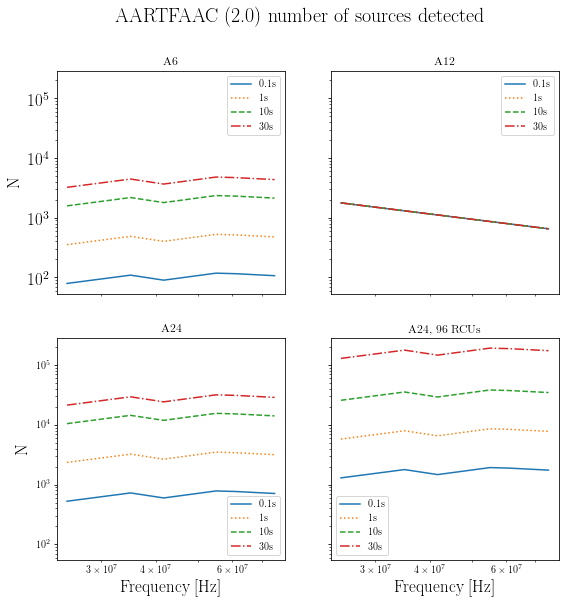

In [11]:
# From LOFAR sensitivity memo Nijboer():
# Classical image noise

import numpy as np

eta = 1. # system efficiency factor
k = 1.38e-23 # Boltzmann constant,  m^2 kg s^-2 K^-1
# 1Jy = 10^-26 W m^-2 Hz^-1 = 10^-26 kg m^2 s^-3 m^-2 s = kg s^-2
#A_eff_outer = 256. # m^2, for 48 dipoles in LBA_OUTER

FoV = 76.
sigma = 5.

A = 1.13 * np.power(FoV, 2.)

A_eff_outer = np.interp(frequency, np.array([15., 30., 41.7, 61., 75.])*1.e6, 
                        np.array([1973.4, 1343.5, 693.61, 398.18, 256.])) # 48 dipoles, LBA_OUTER, 
                                                                          # A_eff coupling dependent
                                                                          # interpolated from Nijboer et al. memo

N6 = 6. # A6
N12 = 12.
N24 = 24.

SEFD = (2.* eta * k * T_sky) / (A_eff_outer * 1.e-26) # m^2 kg s^-2 K^-1 K m^-2 = kg s^-2, divide by 10^-26 to be in Jy

SEFD_96 = (2.* eta * k * T_sky) / (A_eff_outer * 2. * 1.e-26) # 96 dipoles

dT01 = 0.1 # seconds
dT1 = 1.
dT10 = 10.
dT30 = 30.
dT900 = 900.

dF2m = 1.5 # MHz (bandwidth, 1 SB)
print dF2m
#print 'T_sky: ', T_sky
#print 'Frequencies: ', frequency
#print 'SEFD of a LOFAR station in LBA_OUTER mode: ', SEFD/1.e3, ' kJy'
#print 'First SEFD value: ', (2.* eta * k * T_sky[0]) / (A_eff_outer[0] * 1.e-26) / 1.e3

sigma_rms_image_lofar6_01s = SEFD / np.sqrt(N6 * (N6 - 1) * N_if * dT01 * dF2m * 1.e6) # have to convert to BW in Hz instead of MHz
sigma_rms_image_lofar6_1s = SEFD / np.sqrt(N6 * (N6 - 1) * N_if * dT1 * dF2m * 1.e6)
sigma_rms_image_lofar6_10s = SEFD / np.sqrt(N6 * (N6 - 1) * N_if * dT10 * dF2m * 1.e6)
sigma_rms_image_lofar6_30s = SEFD / np.sqrt(N6 * (N6 - 1) * N_if * dT30 * dF2m * 1.e6)

sigma_rms_image_lofar12_01s = SEFD / np.sqrt(N12 * (N12 - 1) * N_if * dT01 * dF2m * 1.e6) # have to convert to BW in Hz instead of MHz
sigma_rms_image_lofar12_1s = SEFD / np.sqrt(N12 * (N12 - 1) * N_if * dT1 * dF2m * 1.e6)
sigma_rms_image_lofar12_10s = SEFD / np.sqrt(N12 * (N12 - 1) * N_if * dT10 * dF2m * 1.e6)
sigma_rms_image_lofar12_900s = SEFD / np.sqrt(N12 * (N12- 1) * N_if * dT900 * dF2m * 1.e6)

sigma_rms_image_lofar24_01s = SEFD / np.sqrt(N24 * (N24 - 1) * N_if * dT01 * dF2m * 1.e6) # have to convert to BW in Hz instead of MHz
sigma_rms_image_lofar24_1s = SEFD / np.sqrt(N24* (N24 - 1) * N_if * dT1 * dF2m * 1.e6)
sigma_rms_image_lofar24_10s = SEFD / np.sqrt(N24 * (N24 - 1) * N_if * dT10 * dF2m * 1.e6)
sigma_rms_image_lofar24_30s = SEFD / np.sqrt(N24 * (N24 - 1) * N_if * dT30 * dF2m * 1.e6)

sigma_rms_image_lofar24_96_01s = SEFD_96 / np.sqrt(N24 * (N24 - 1) * N_if * dT01 * dF2m * 1.e6) # have to convert to BW in Hz instead of MHz
sigma_rms_image_lofar24_96_1s = SEFD_96 / np.sqrt(N24 * (N24 - 1) * N_if * dT1 * dF2m * 1.e6)
sigma_rms_image_lofar24_96_10s = SEFD_96 / np.sqrt(N24 * (N24 - 1) * N_if * dT10 * dF2m * 1.e6)
sigma_rms_image_lofar24_96_30s = SEFD_96 / np.sqrt(N24 * (N24 - 1) * N_if * dT30 * dF6m * 1.e6)

sigma_rms_image_lofar12_01s = 1.3
sigma_rms_image_lofar12_1s = 1.3
sigma_rms_image_lofar12_10s = 1.3
sigma_rms_image_lofar12_30s = 1.3

#print 'A12 image RMS noise (LOFAR calculation): ', sigma_rms_image_lofar12_1s, ' Jy/beam'

N_lofar6_01s = 1.14 * np.power(sigma_rms_image_lofar6_01s * sigma, -1.30) * np.power(3.e8/(frequency * 4.), 0.91) * A
N_lofar6_1s = 1.14 * np.power(sigma_rms_image_lofar6_1s * sigma, -1.30) * np.power(3.e8/(frequency * 4.), 0.91) * A
N_lofar6_10s = 1.14 * np.power(sigma_rms_image_lofar6_10s * sigma, -1.30) * np.power(3.e8/(frequency * 4.), 0.91) * A
N_lofar6_30s = 1.14 * np.power(sigma_rms_image_lofar6_30s * sigma, -1.30) * np.power(3.e8/(frequency * 4.), 0.91) * A

N_lofar12_01s = 1.14 * np.power(sigma_rms_image_lofar12_01s * sigma, -1.30) * np.power(3.e8/(frequency * 4.), 0.91) * A
N_lofar12_1s = 1.14 * np.power(sigma_rms_image_lofar12_1s * sigma, -1.30) * np.power(3.e8/(frequency * 4.), 0.91) * A
N_lofar12_10s = 1.14 * np.power(sigma_rms_image_lofar12_10s * sigma, -1.30) * np.power(3.e8/(frequency * 4.), 0.91) * A
N_lofar12_900s = 1.14 * np.power(sigma_rms_image_lofar12_30s * sigma, -1.30) * np.power(3.e8/(frequency * 4.), 0.91) * A

N_lofar24_01s = 1.14 * np.power(sigma_rms_image_lofar24_01s * sigma, -1.30) * np.power(3.e8/(frequency * 4.), 0.91) * A
N_lofar24_1s = 1.14 * np.power(sigma_rms_image_lofar24_1s * sigma, -1.30) * np.power(3.e8/(frequency * 4.), 0.91) * A
N_lofar24_10s = 1.14 * np.power(sigma_rms_image_lofar24_10s * sigma, -1.30) * np.power(3.e8/(frequency * 4.), 0.91) * A
N_lofar24_30s = 1.14 * np.power(sigma_rms_image_lofar24_30s * sigma, -1.30) * np.power(3.e8/(frequency * 4.), 0.91) * A

N_lofar24_96_01s = 1.14 * np.power(sigma_rms_image_lofar24_96_01s * sigma, -1.30) * np.power(3.e8/(frequency * 4.), 0.91) * A
N_lofar24_96_1s = 1.14 * np.power(sigma_rms_image_lofar24_96_1s * sigma, -1.30) * np.power(3.e8/(frequency * 4.), 0.91) * A
N_lofar24_96_10s = 1.14 * np.power(sigma_rms_image_lofar24_96_10s * sigma, -1.30) * np.power(3.e8/(frequency * 4.), 0.91) * A
N_lofar24_96_30s = 1.14 * np.power(sigma_rms_image_lofar24_96_30s * sigma, -1.30) * np.power(3.e8/(frequency * 4.), 0.91) * A

print N_lofar12_900s, "A12 sources."

f, ((axis1, axis2), (axis3, axis4)) = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(9, 9))
#f.subplots_adjust(hspace=0, wspace=0)
f.suptitle('AARTFAAC (2.0) number of sources detected', fontsize=20)
#f.tight_layout()
#axis1.set_aspect('equal')
axis1.tick_params(axis='y', labelsize=17)

axis1.set_title('A6')
axis1.loglog(frequency, N_lofar6_01s, '-', frequency, N_lofar6_1s, ':', 
             frequency, N_lofar6_10s, '--', frequency, N_lofar6_30s, '-.')
axis1.legend(['0.1s','1s','10s', '30s'])
axis1.set_ylabel('N', fontsize=17)

axis2.set_title('A12')
axis2.loglog(frequency, N_lofar12_01s, '-', frequency, N_lofar12_1s, ':', 
             frequency, N_lofar12_10s, '--', frequency, N_lofar12_900s, '-.')
axis2.legend(['0.1s','1s','10s', '30s'])

axis3.set_title('A24')
axis3.loglog(frequency, N_lofar24_01s, '-', frequency, N_lofar24_1s, ':', 
             frequency, N_lofar24_10s, '--', frequency, N_lofar24_30s, '-.')
axis3.legend(['0.1s','1s','10s', '30s'])
axis3.set_ylabel('N', fontsize=17)
axis3.set_xlabel('Frequency [Hz]', fontsize=17)

axis4.set_title('A24, 96 RCUs')
axis4.loglog(frequency, N_lofar24_96_01s, '-', frequency, N_lofar24_96_1s, ':', 
             frequency, N_lofar24_96_10s, '--', frequency, N_lofar24_96_30s, '-.')
axis4.legend(['0.1s','1s','10s', '30s'])

axis4.set_xlabel('Frequency [Hz]', fontsize=17)


In [32]:
side_over_confusion = 120./(10./60.)
print side_over_confusion

720.0


In [19]:
# Measured Stokes V noise for various obseervation duration

t_obs = [1., 2., 4., 8.] # minutes
noise_v = [0.21, 0.19, 0.15, 0.13] # Jy/PSF

print np.sqrt(t_obs)
print 0.13/np.sqrt(15./8.)

[1.         1.41421356 2.         2.82842712]
0.09493857663422879


In [5]:
import numpy as np
#SBs = np.array([102.,122.,143.,163.,184.,204.,225.,245.,266.,286.,307.,312.,327.,348.,368.,389.])
SBs = np.array([110.,111.,112.,113.,114.,115.,116.,117.,309.,310.,311.,312.,313.,314.,315.,316.])
vclk = 200. # MHz
n = 1. # Nyquist zone
freqs = (n - 1. + (SBs / 512.)) * (vclk / 2.)

print freqs * 1.e6

[21484375.  21679687.5 21875000.  22070312.5 22265625.  22460937.5
 22656250.  22851562.5 60351562.5 60546875.  60742187.5 60937500.
 61132812.5 61328125.  61523437.5 61718750. ]


In [4]:
import numpy as np
freqs = np.array([41015625., 41210937.5, 41406250.,  41601562.5, 41796875., 41992187.5, \
                  42187500., 42382812.5, 60351562.5, 60546875., 60742187.5, 60937500., \
                  61132812.5, 61328125.,  61523437.5, 61718750.])
vclk = 200. # MHz
n = 1. # Nyquist zone
SBs = (((freqs / 1.e6) / (vclk / 2.)) - n + 1) * 512.

print SBs

[210. 211. 212. 213. 214. 215. 216. 217. 309. 310. 311. 312. 313. 314.
 315. 316.]
